# Clustering - Hierarchial 
### Problem Statement:
Given the google rating data, use a hierarchical clustering algorithm to cluster reviews.

In [2]:
# Load the libraries 
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

### Read the data 

In [3]:
# Read the data 
travel = pd.read_csv(r"D:\new Data science class\project\9. HierarchicalClustering\Hierarchical Clustering\Dataset\google_review_ratings.csv")

In [4]:
# Primary data inspection 
travel.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


### Data fields:
* This data set is populated by capturing user ratings from Google reviews. Reviews on attractions from 24 categories across Europe are considered. Google user rating ranges from 1 to 5 and the average user rating per category is calculated.
#### Variable Description:
* User --  Unique user id 
* Attribute 1  -- Average ratings on churches 
* Attribute 2  -- Average ratings on resorts
* Attribute 3  -- Average ratings on beaches 
* Attribute 4  -- Average ratings on parks 
* Attribute 5  -- Average ratings on theatres 
* Attribute 6  -- Average ratings on museums 
* Attribute 7  -- Average ratings on malls 
* Attribute 8  -- Average ratings on zoo 
* Attribute 9  -- Average ratings on restaurants 
* Attribute 10 -- Average ratings on pubs/bars 
* Attribute 11 -- Average ratings on local services 
* Attribute 12 -- Average ratings on burger/pizza shops 
* Attribute 13 -- Average ratings on hotels/other lodgings 
* Attribute 14 -- Average ratings on juice bars 
* Attribute 15 -- Average ratings on art galleries 
* Attribute 16 -- Average ratings on dance clubs 
* Attribute 17 -- Average ratings on swimming pools 
* Attribute 18 -- Average ratings on gyms 
* Attribute 19 -- Average ratings on bakeries
* Attribute 20 -- Average ratings on beauty & spas 
* Attribute 21 -- Average ratings on cafes 
* Attribute 22 -- Average ratings on viewpoints 
* Attribute 23 -- Average ratings on monuments 
* Attribute 24 -- Average ratings on gardens

### EDA

In [5]:
# Primary data analysis 
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

* last column has only 2 non null values
* Hence we will drop it as it is not useful for analysis 

In [6]:
# dropping colum "Unnamed25"
travel.drop('Unnamed: 25',1, inplace = True)

In [7]:
# Checking all the columns in dataset 
travel.columns

Index(['User', 'Category 1', 'Category 2', 'Category 3', 'Category 4',
       'Category 5', 'Category 6', 'Category 7', 'Category 8', 'Category 9',
       'Category 10', 'Category 11', 'Category 12', 'Category 13',
       'Category 14', 'Category 15', 'Category 16', 'Category 17',
       'Category 18', 'Category 19', 'Category 20', 'Category 21',
       'Category 22', 'Category 23', 'Category 24'],
      dtype='object')

* The column names are very confusing, renaming them from on the basis of data description for better understanding 

#### Renaming the columns 

In [8]:
# renaming the columns
column_names= ['User','churches','resorts','beaches','parks','theatres','museums','malls','zoo','restaurants','pubs/bars',
              'local services','burger/pizza shops','hotels/other lodgings','juice bars','art galleries','dance clubs',
              'swimming pools','gyms','bakeries','beauty & spas','cafes','viewpoints','monuments','gardens']
travel.columns= column_names

#### Null check 

In [9]:
# check for nulls 
travel.isnull().sum()

User                     0
churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoo                      0
restaurants              0
pubs/bars                0
local services           0
burger/pizza shops       1
hotels/other lodgings    0
juice bars               0
art galleries            0
dance clubs              0
swimming pools           0
gyms                     0
bakeries                 0
beauty & spas            0
cafes                    0
viewpoints               0
monuments                0
gardens                  1
dtype: int64

* There is one null in burger/pizza column and one null in gardens

#### Null imputation 

In [10]:
# replacing nulls with 0 
travel = travel.fillna(0)
travel.isnull().sum()

User                     0
churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoo                      0
restaurants              0
pubs/bars                0
local services           0
burger/pizza shops       0
hotels/other lodgings    0
juice bars               0
art galleries            0
dance clubs              0
swimming pools           0
gyms                     0
bakeries                 0
beauty & spas            0
cafes                    0
viewpoints               0
monuments                0
gardens                  0
dtype: int64

#### Check datatypes of columns 

In [11]:
# check datatypes of columns
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   User                   5456 non-null   object 
 1   churches               5456 non-null   float64
 2   resorts                5456 non-null   float64
 3   beaches                5456 non-null   float64
 4   parks                  5456 non-null   float64
 5   theatres               5456 non-null   float64
 6   museums                5456 non-null   float64
 7   malls                  5456 non-null   float64
 8   zoo                    5456 non-null   float64
 9   restaurants            5456 non-null   float64
 10  pubs/bars              5456 non-null   float64
 11  local services         5456 non-null   object 
 12  burger/pizza shops     5456 non-null   float64
 13  hotels/other lodgings  5456 non-null   float64
 14  juice bars             5456 non-null   float64
 15  art 

* The local services datatype is object but it should be float as other other columns

#### Correcting the datatype of local services column

In [13]:
# But local services contains a string '2\t2.'
# replacing it with zero
travel['local services'][travel['local services'] == '2\t2.'] = 0

# Converting datatype of local services to float
travel['local services'] = travel['local services'].astype('float')

#### Check the description of data 

In [15]:
# check description  of data 
travel.describe()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,viewpoints,monuments,gardens
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,2.206573,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560469
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.715961,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171840
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,1.330000,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,4.440000,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#### Dropping unwanted columns 

In [16]:
# drop column user
travel.drop('User',1, inplace = True )

### Scaling the data 

In [17]:
# standardize the data 
travel_ss = travel.copy()

ss = StandardScaler()
travel_ss.iloc[:,:] = ss.fit_transform(travel_ss.iloc[:,:])

In [18]:
travel_ss.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,viewpoints,monuments,gardens
0,-1.759118,-1.632094,0.914217,0.651710,1.524392,0.020674,1.166442,-0.171688,-0.586741,-0.147398,...,-0.271927,-0.544583,-0.461456,-0.867686,-0.390254,-0.837734,-1.038794,-1.095052,-1.16304,-1.331763
1,-1.759118,-1.632094,0.914217,0.651710,1.524392,0.020674,1.166442,0.089270,-0.586741,-0.139750,...,-0.271927,-0.544583,-0.461456,-0.867686,-0.390254,-0.837734,-1.038794,-1.095052,-1.16304,-1.331763
2,-1.759118,-1.632094,0.914217,0.636432,1.524392,0.020674,1.166442,0.089270,-0.586741,-0.147398,...,-0.271927,-0.544583,-0.461456,-0.867686,-0.390254,-0.837734,-1.038794,-1.095052,-1.16304,-1.331763
3,-1.759118,-1.280305,0.914217,0.636432,1.524392,0.020674,1.166442,-0.171688,-0.586741,-0.147398,...,-0.271927,-0.544583,-0.461456,-0.867686,-0.390254,-0.837734,-1.038794,-1.095052,-1.16304,-1.331763
4,-1.759118,-1.632094,0.914217,0.636432,1.524392,0.020674,1.166442,0.089270,-0.586741,-0.147398,...,-0.271927,-0.544583,-0.461456,-0.867686,-0.390254,-0.837734,-1.038794,-1.095052,-1.16304,-1.331763


### Plotting Dendogram 

Text(0, 0.5, 'Distances')

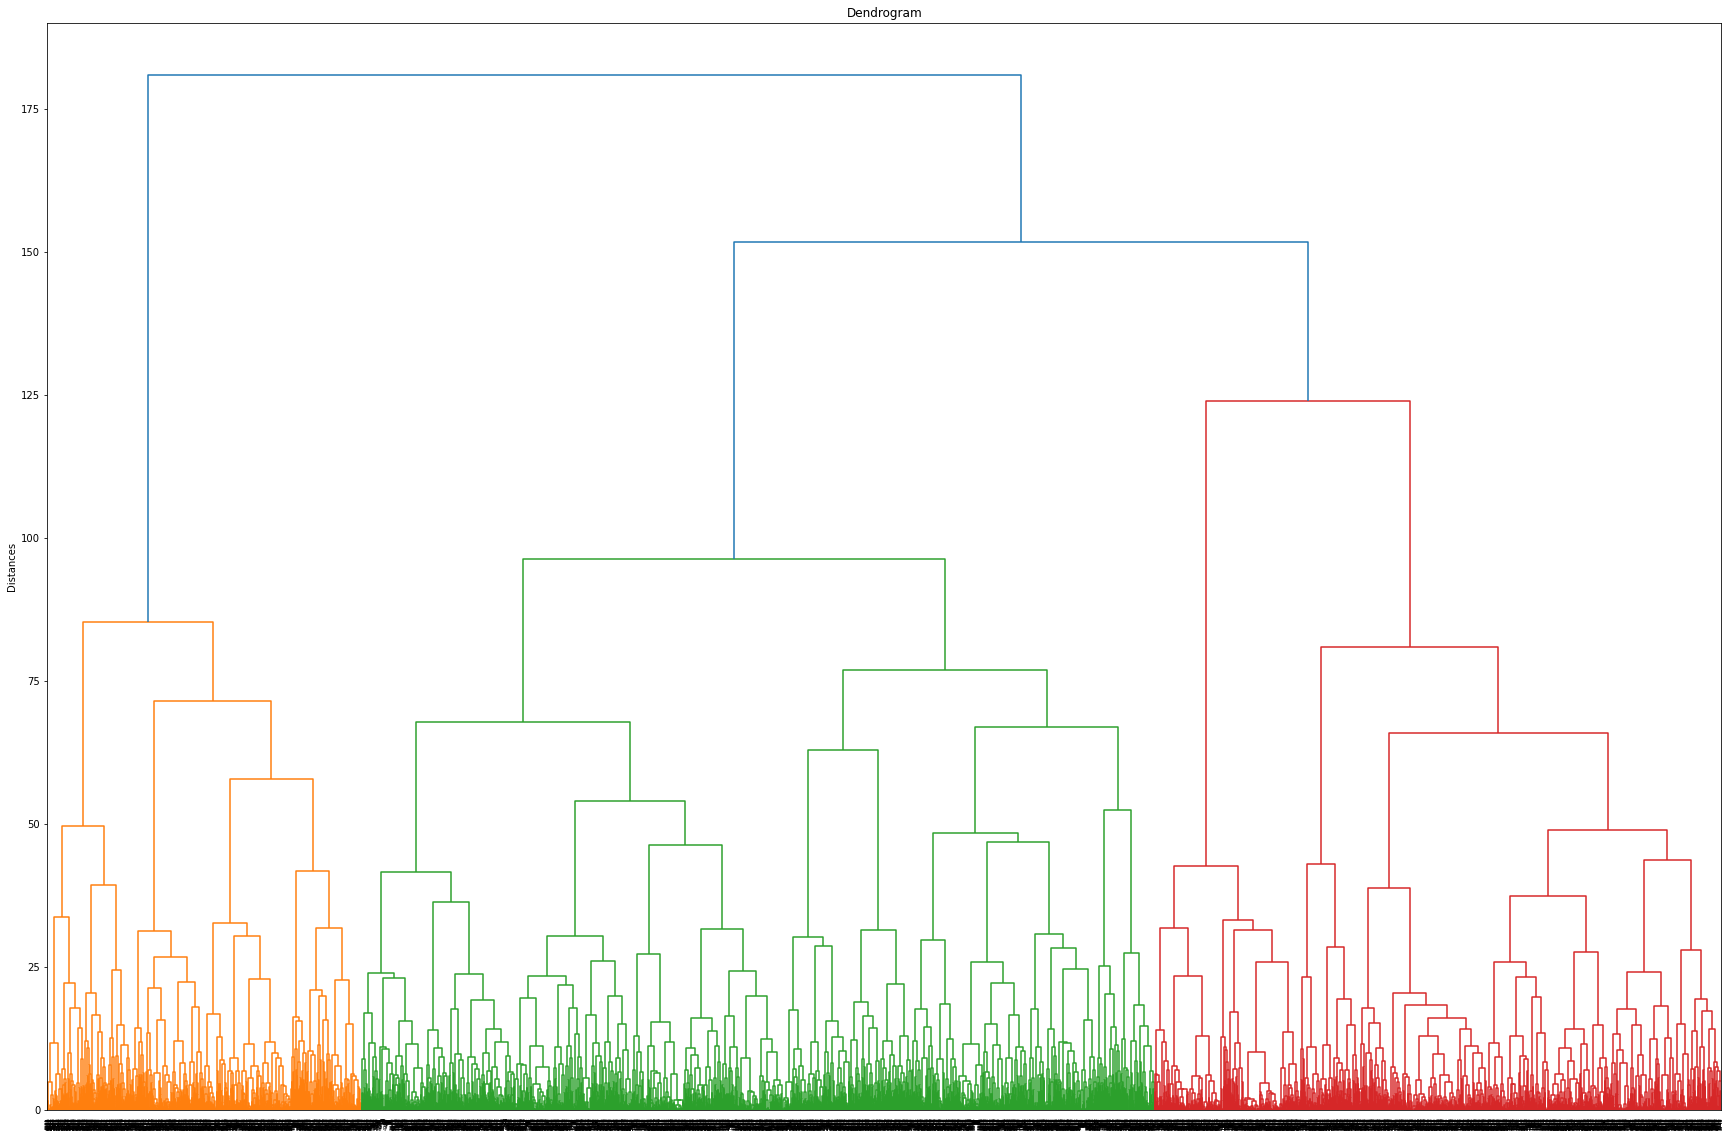

In [19]:
# plot the dendrogram to determine the optimal clusters
plt.figure(figsize=(30,20))
dendro = sch.dendrogram(sch.linkage(travel_ss, method = 'ward'))
plt.title("Dendrogram")
plt.ylabel("Distances")

### Building clusters 

In [21]:
# from dendogram optimal clusters= 3 
optimal_cluster = 3

# build the clusters
clusters = AgglomerativeClustering(n_clusters=optimal_cluster).fit_predict(travel_ss)

In [22]:
clusters

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [23]:
# Adding cluster to dataset 
travel["cluster"] = clusters

### Distribution of clusters 

In [25]:
# Check the distribution of clusters 
travel['cluster'].value_counts()

2    2585
0    1847
1    1024
Name: cluster, dtype: int64

### Interpretation of clusters 

In [27]:
pd.set_option('display.max_columns', 30)
travel[travel['cluster'] == 0].sample(5)

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,local services,burger/pizza shops,hotels/other lodgings,juice bars,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,viewpoints,monuments,gardens,cluster
2015,1.43,1.45,1.66,1.96,5.00,1.78,3.20,5.00,3.83,5.00,5.0,1.56,1.49,1.47,1.47,0.78,0.64,0.00,0.00,0.0,0.64,1.50,1.17,1.44,0
3437,1.36,1.36,1.38,2.62,2.60,2.60,3.26,3.24,5.00,5.00,5.0,0.91,0.89,0.90,0.92,1.10,0.51,0.00,0.00,0.0,0.00,0.52,1.41,1.37,0
1123,1.48,1.47,1.48,1.51,1.99,5.00,5.00,3.21,5.00,3.82,5.0,5.00,1.50,1.49,1.50,0.78,0.74,0.50,0.00,0.0,0.00,5.00,1.52,1.20,0
5212,0.00,0.51,1.45,1.44,1.45,1.62,5.00,1.53,3.30,3.31,3.3,3.95,3.92,5.00,0.83,0.82,0.82,1.01,1.02,0.0,0.00,0.00,0.00,0.00,0
56,0.69,0.69,0.72,5.00,3.83,2.96,2.94,5.00,2.89,2.16,5.0,1.44,1.43,1.43,1.55,1.56,0.63,0.00,0.00,0.0,0.50,0.63,0.62,0.64,0


cluster 0 people have given more ratings to theatres,malls,zoo,restaurants,pubs/bars,localservices. This category may be youth 

In [30]:
pd.set_option('display.max_columns', 30)
travel[travel['cluster'] == 1].sample(5)

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,local services,burger/pizza shops,hotels/other lodgings,juice bars,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,viewpoints,monuments,gardens,cluster
782,2.02,2.05,2.93,2.03,2.01,2.03,5.00,1.77,2.04,1.72,1.70,1.71,1.73,2.27,1.63,1.41,1.39,1.41,5.00,2.05,0.73,2.00,1.98,1.99,1
1765,2.64,2.64,2.19,1.89,1.88,1.89,1.35,1.33,1.34,1.60,1.20,0.80,0.78,0.78,0.83,0.89,0.84,0.81,0.80,0.78,0.80,4.84,3.62,5.00,1
4470,2.32,2.31,2.32,2.25,2.25,1.65,1.37,1.36,1.37,1.59,1.42,1.88,1.13,1.12,1.13,1.15,1.11,2.36,2.34,2.33,2.35,4.17,2.40,5.00,1
2583,1.70,2.10,2.64,1.92,1.91,1.96,5.00,1.96,2.43,2.02,2.00,2.01,2.03,2.56,5.00,1.62,1.49,4.23,5.00,0.61,0.83,1.69,1.68,1.69,1
1797,4.43,3.63,3.68,2.69,2.68,2.68,2.64,1.43,1.41,1.39,1.38,1.40,1.52,1.62,0.90,0.75,0.74,0.75,5.00,0.78,0.76,0.75,0.73,0.74,1


cluster 1 people have given more ratings to churches,beaches,bakeries, monumnets,gardens
This can be a family or senior citizens.

In [31]:
pd.set_option('display.max_columns', 30)
travel[travel['cluster'] == 2].sample(5)

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,local services,burger/pizza shops,hotels/other lodgings,juice bars,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,viewpoints,monuments,gardens,cluster
3213,1.41,5.00,5.00,2.90,5.00,2.82,5.00,2.85,2.84,2.84,5.00,2.16,2.18,2.20,3.41,0.61,0.59,0.58,0.59,0.62,0.64,0.73,0.74,0.76,2
344,1.35,2.42,2.41,2.62,5.00,2.15,5.00,3.84,2.83,2.81,3.00,1.81,5.00,5.00,0.79,0.77,0.78,0.00,0.89,0.82,0.86,1.10,0.90,5.00,2
95,1.23,1.26,1.28,4.67,4.10,5.00,2.77,2.74,2.49,1.63,1.63,0.88,0.86,0.85,0.86,0.88,0.91,0.82,0.67,0.66,0.67,0.83,1.20,1.19,2
560,0.69,0.72,1.48,2.78,3.26,5.00,5.00,1.60,5.00,1.56,1.55,1.56,5.00,5.00,5.00,0.73,0.72,0.73,0.77,0.74,0.69,0.67,0.66,0.67,2
3385,1.01,5.00,1.73,2.26,3.02,3.07,5.00,1.34,5.00,1.30,1.28,1.32,1.53,1.53,1.56,0.66,0.64,0.65,0.67,0.69,1.00,0.98,0.97,1.07,2


cluster 2 people have given more ratings to beaches, resorts, parks, theatres, museums, restaurants and zoo as compared to other categories. So, might be more of families with small childrens.